# Integrador del Módulo 6

### EDA

Se realiza el analisis exploratorio de datos sobre el dataframe provisto por el cliente.

##### Importamos las librerías

In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

##### Cargamos el Dataframe

In [16]:
df = pd.read_csv('Datasets/BBDD_Hospitalización.csv', encoding='ISO-8859-1')

##### Realizamos una descripción general de los datos

In [21]:
df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,"7,7",NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [24]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    object 
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

,EDAD,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,568.000000,568.000000,568.000000,568.000000
mean,63.882042,12.996479,0.165493,0.014085
std,9.281517,3.921180,0.958066,0.196474
min,39.000000,4.000000,0.000000,0.000000
25%,59.000000,12.000000,0.000000,0.000000
50%,64.000000,12.000000,0.000000,0.000000
75%,69.000000,12.000000,0.000000,0.000000
max,151.000000,24.000000,12.000000,3.000000


##### Procedemos a la visualización de los datos

+ Histograma de variables numéricas

Text(0.5, 1.0, 'Histograma de las Edades')

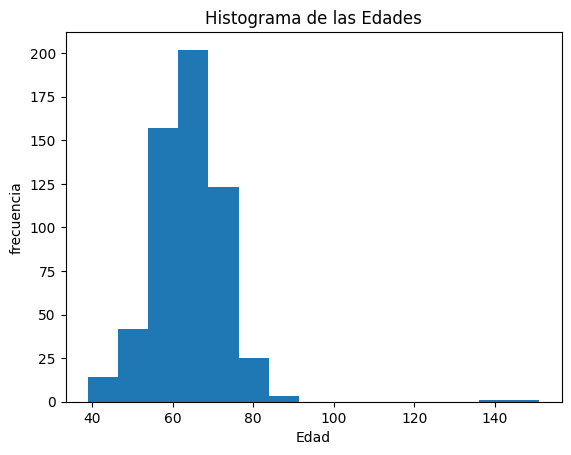

In [26]:
plt.hist(df["EDAD"],bins=15)
plt.xlabel("Edad")
plt.ylabel("frecuencia")
plt.title("Histograma de las Edades")

Text(0.5, 1.0, 'Histograma de la Cantidad de Muestras Tomadas')

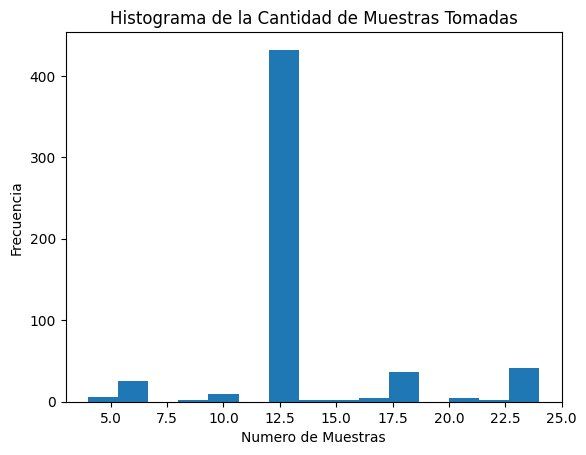

In [27]:
plt.hist(df["NUMERO DE MUESTRAS TOMADAS"],bins=15)
plt.xlabel("Numero de Muestras")
plt.ylabel("Frecuencia")
plt.title("Histograma de la Cantidad de Muestras Tomadas")

Text(0.5, 1.0, 'Histograma de la Cantidad días Hospitalizado MQ')

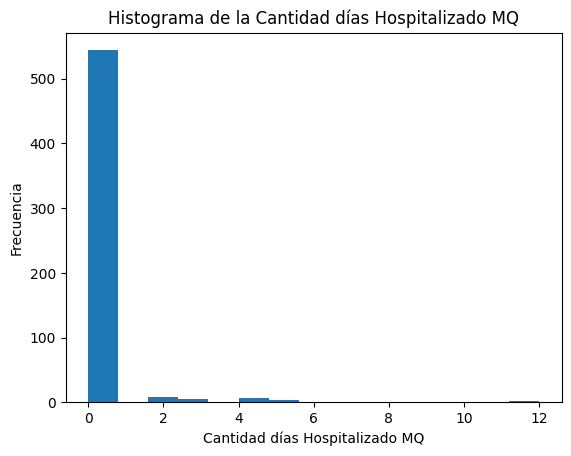

In [28]:
plt.hist(df["DIAS HOSPITALIZACION MQ"],bins=15)
plt.xlabel("Cantidad días Hospitalizado MQ")
plt.ylabel("Frecuencia")
plt.title("Histograma de la Cantidad días Hospitalizado MQ")

Text(0.5, 1.0, 'Histograma de la Cantidad días Hospitalizado UPC')

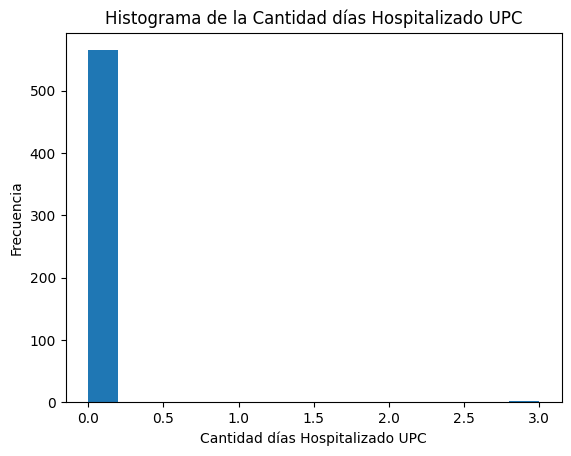

In [29]:
plt.hist(df["DIAS HOSPITALIZACIÓN UPC"],bins=15)
plt.xlabel("Cantidad días Hospitalizado UPC")
plt.ylabel("Frecuencia")
plt.title("Histograma de la Cantidad días Hospitalizado UPC")

+ Boxplot de variables numéricas

<Axes: >

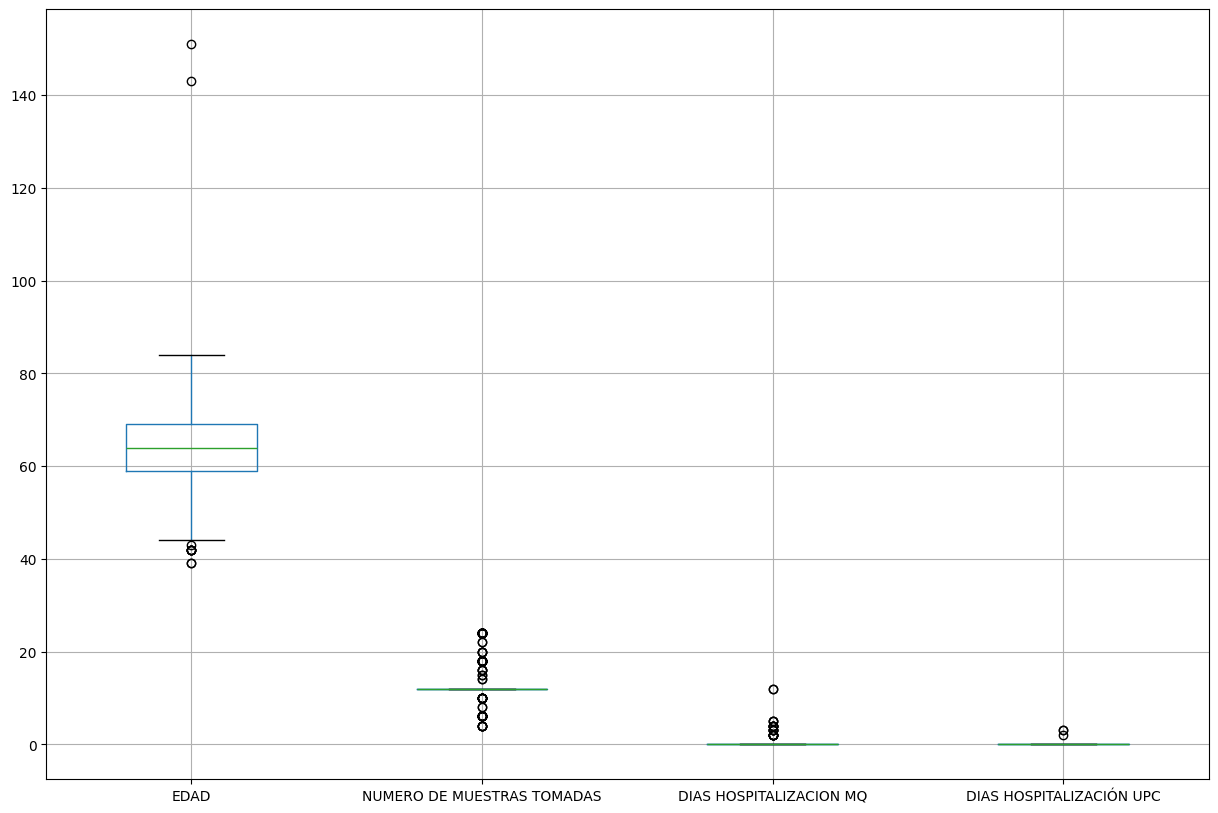

In [36]:
df.boxplot(figsize=(15, 10))


+ Distribución de variables categóricas

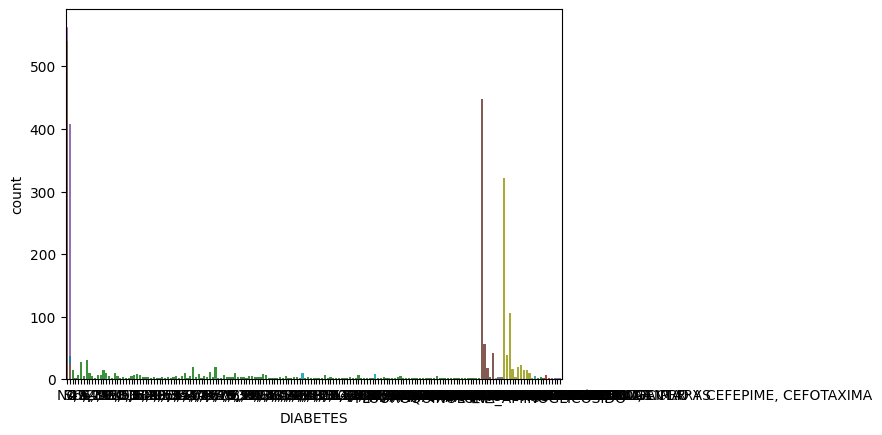

In [19]:
for col in df.select_dtypes(include=['object', 'category']):
    sns.countplot(x=col, data=df)

##### Buscamos la cantidad de valores nulos

In [25]:
df.isnull().sum()

EDAD                                                                          2
DIABETES                                                                      2
HOSPITALIZACIÓN ULTIMO MES                                                    2
PSA                                                                           6
BIOPSIAS PREVIAS                                                              4
VOLUMEN PROSTATICO                                                            3
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       2
NUMERO DE MUESTRAS TOMADAS                                                    2
CUP                                                                           2
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             4
BIOPSIA                                                                       2
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     2
FIEBRE                                  